<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#[10pts]-Import-datasets" data-toc-modified-id="[10pts]-Import-datasets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>[10pts] Import datasets</a></span></li><li><span><a href="#[10pts]-One-hot-encoding" data-toc-modified-id="[10pts]-One-hot-encoding-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>[10pts] One-hot encoding</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#[10pts]-Definition" data-toc-modified-id="[10pts]-Definition-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>[10pts] Definition</a></span></li><li><span><a href="#[10pts]-Compile" data-toc-modified-id="[10pts]-Compile-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>[10pts] Compile</a></span></li><li><span><a href="#[10pts]-Training" data-toc-modified-id="[10pts]-Training-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>[10pts] Training</a></span></li><li><span><a href="#[10pts]-Analysis" data-toc-modified-id="[10pts]-Analysis-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>[10pts] Analysis</a></span></li></ul></li><li><span><a href="#Repeat-training-with-different-hyperparameters" data-toc-modified-id="Repeat-training-with-different-hyperparameters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Repeat training with different hyperparameters</a></span><ul class="toc-item"><li><span><a href="#[20pts]-New-model-1" data-toc-modified-id="[20pts]-New-model-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>[20pts] New model 1</a></span></li><li><span><a href="#[20pts]-New-model-2" data-toc-modified-id="[20pts]-New-model-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>[20pts] New model 2</a></span></li></ul></li></ul></div>

# Import libraries

In [75]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Data

## [10pts] Import datasets

請前往 https://github.com/zalandoresearch/fashion-mnist 了解該 dataset 的詳情，然後下載 dataset。

提示：使用 `tensorflow.keras.datasets.fashion_mnist.load_data` 下載更方便

In [24]:
datasets = tf.keras.datasets.fashion_mnist
(train_in, train_target), (test_in, test_target) = datasets.load_data()

## [10pts] One-hot encoding

把每筆數據的 label／target 部份轉化為 one-hot encoding

提示：使用 `tensorflow.keras.utils.to_categorical`

In [44]:
train_label = tf.keras.utils.to_categorical(train_target, 10)
test_label = tf.keras.utils.to_categorical(test_target, 10)

(60000, 28, 28)


# Model

## [10pts] Definition

定義一個 neural network model，具有以下 layers：
1. Input layer
2. Flatten layer
3. 自選數目的 Dense layer (自選數目 neuron)
4. 最後的 output layer（neuron數＝10， activation funciton ＝ softmax）

In [70]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
model.add(tf.keras.layers.Dense(784, activation = "sigmoid"))
model.add(tf.keras.layers.Dense(392, activation = "sigmoid"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

## [10pts] Compile

使用以下設定來 compile 上面所定義的 neural network：
1. loss function：`categorical_crossentropy`
2. optimizer：自訂
3. metrics：`accuracy`

In [71]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "SGD",
    metrics = ["accuracy"]
)

## [10pts] Training

1. 使用 test set 數據來作為 validation data
2. epoch 數：自訂 (>10)

In [72]:
hist = model.fit(
    train_in,
    train_label,
    epochs = 16,
    validation_data = (test_in, test_label)
)

Epoch 1/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8638 - accuracy: 0.7447 - val_loss: 0.6163 - val_accuracy: 0.7759
Epoch 2/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5492 - accuracy: 0.8110 - val_loss: 0.5471 - val_accuracy: 0.8092
Epoch 3/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5137 - accuracy: 0.8231 - val_loss: 0.5394 - val_accuracy: 0.8138
Epoch 4/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5048 - accuracy: 0.8246 - val_loss: 0.5331 - val_accuracy: 0.8154
Epoch 5/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5046 - accuracy: 0.8242 - val_loss: 0.5343 - val_accuracy: 0.8093
Epoch 6/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5002 - accuracy: 0.8236 - val_loss: 0.5375 - val_accuracy: 0.8012
Epoch 7/16
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5015 - accuracy: 0.8237 - val_loss: 0.5185 - val_accuracy:

## [10pts] Analysis

請在下方使用變量 `hist` 中的 `history` 畫出：
1. `loss` 對 epoch 關係
2. `val_loss` 對 epoch 關係

推薦使用 `matplotlib.pyplot.plot`，並加上 legend。

{'loss': [0.8637648224830627, 0.5492225885391235, 0.5137448906898499, 0.5047746896743774, 0.5046436786651611, 0.5002263784408569, 0.5015246272087097, 0.4973772466182709, 0.5011442303657532, 0.5079343914985657, 0.5064905285835266, 0.512645959854126, 0.5166734457015991, 0.5164478421211243, 0.514951765537262, 0.5233105421066284], 'accuracy': [0.7446666955947876, 0.8110166788101196, 0.823116660118103, 0.8246166706085205, 0.8241833448410034, 0.8235999941825867, 0.8236666917800903, 0.8269333243370056, 0.8260666728019714, 0.8208666443824768, 0.8196499943733215, 0.8191999793052673, 0.8168666958808899, 0.817799985408783, 0.8179166913032532, 0.8143666386604309], 'val_loss': [0.616254985332489, 0.5471041798591614, 0.539424479007721, 0.5331473350524902, 0.53425133228302, 0.5374592542648315, 0.5184527635574341, 0.5256620049476624, 0.5256962776184082, 0.5462652444839478, 0.5622474551200867, 0.5337461829185486, 0.5506272315979004, 0.5618954300880432, 0.5523816347122192, 0.5768837928771973], 'val_accu

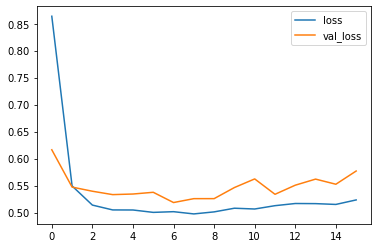

In [80]:
plt.figure()
plt.plot(hist.history["loss"], label = "loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

# Repeat training with different hyperparameters

在這部份請用不同的 hyperparameter (layer number, neuron number, optimizer, initialization, ...etc.) 重新定義兩個 neural network，然後再訓練 dataset。
試指出所得到的 epoch-loss 關係圖和上一個 neural network 有什麼不一樣。

## [20pts] New model 1

Epoch 1/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7387 - accuracy: 0.7476 - val_loss: 0.6318 - val_accuracy: 0.7773
Epoch 2/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5979 - accuracy: 0.7879 - val_loss: 0.6044 - val_accuracy: 0.7790
Epoch 3/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5774 - accuracy: 0.7975 - val_loss: 0.6084 - val_accuracy: 0.7844
Epoch 4/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5731 - accuracy: 0.7965 - val_loss: 0.5983 - val_accuracy: 0.7863
Epoch 5/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5657 - accuracy: 0.8000 - val_loss: 0.5885 - val_accuracy: 0.7925
Epoch 6/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5589 - accuracy: 0.8031 - val_loss: 0.6026 - val_accuracy: 0.7752
Epoch 7/16
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5623 - accuracy: 0.8022 - val_loss: 0.5751 - val_accuracy:

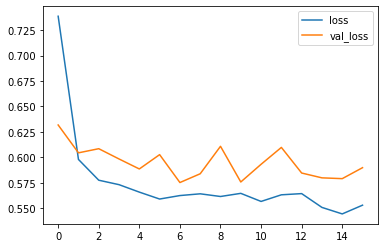

In [81]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
model.add(tf.keras.layers.Dense(392, activation = "sigmoid"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "SGD",
    metrics = ["accuracy"]
)

hist = model.fit(
    train_in,
    train_label,
    epochs = 16,
    validation_data = (test_in, test_label)
)

plt.figure()
plt.plot(hist.history["loss"], label = "loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

loss下降，val_loss平稳，网络可能出现过拟合

## [20pts] New model 2

Epoch 1/16
1875/1875 [==============================] - 2s 1ms/step - loss: 293.4632 - accuracy: 0.1329 - val_loss: 2.2940 - val_accuracy: 0.1049
Epoch 2/16
1875/1875 [==============================] - 2s 998us/step - loss: 2.2970 - accuracy: 0.1089 - val_loss: 2.2822 - val_accuracy: 0.1093
Epoch 3/16
1875/1875 [==============================] - 2s 981us/step - loss: 2.2258 - accuracy: 0.1385 - val_loss: 2.1866 - val_accuracy: 0.1471
Epoch 4/16
1875/1875 [==============================] - 2s 986us/step - loss: 2.1714 - accuracy: 0.1578 - val_loss: 2.1467 - val_accuracy: 0.1626
Epoch 5/16
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1785 - accuracy: 0.1547 - val_loss: 2.1908 - val_accuracy: 0.1470
Epoch 6/16
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1701 - accuracy: 0.1628 - val_loss: 2.1588 - val_accuracy: 0.1551
Epoch 7/16
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1722 - accuracy: 0.1605 - val_loss: 2.2405 - val_a

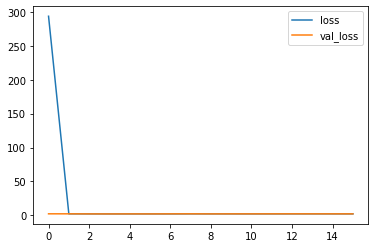

In [82]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28, 28]))
model.add(tf.keras.layers.Dense(392, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "SGD",
    metrics = ["accuracy"]
)

hist = model.fit(
    train_in,
    train_label,
    epochs = 16,
    validation_data = (test_in, test_label)
)

plt.figure()
plt.plot(hist.history["loss"], label = "loss")
plt.plot(hist.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

relu激活函数不适合该问题